# Embedder

## Setup

In [8]:
import torch
import os
import subprocess
import tensorflow as tf

In [9]:
torch.cuda.is_available()

True

In [10]:
if not os.path.exists("datasets/DATASET-NAME"):
    print("Starting download script")
    output = subprocess.check_output(["python", "download_datasets.py"])
    print(output.decode())

Starting download script



---
## Dataset download

In [11]:
import tensorflow_datasets as tfds

In [12]:
[i for i in tfds.list_builders() if 'wiki' in i]

['paws_wiki',
 'paws_x_wiki',
 'salient_span_wikipedia',
 'wiki40b',
 'wiki_auto',
 'wiki_bio',
 'wiki_dialog',
 'wiki_table_questions',
 'wiki_table_text',
 'wikiann',
 'wikihow',
 'wikipedia',
 'wikipedia_toxicity_subtypes']

Dataset of choice:
https://www.tensorflow.org/datasets/catalog/wiki_auto

In [13]:
builder = tfds.builder('wiki_auto')

In [14]:
# 1. Create the tfrecord files (no-op if already exists)
builder.download_and_prepare(download_dir="datasets/wiki_auto")

In [15]:
# 2. Load the `tf.data.Dataset`
dataset = builder.as_dataset()
dataset

{'dev': <_PrefetchDataset element_spec={'GLEU-score': TensorSpec(shape=(), dtype=tf.float64, name=None), 'alignment_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'normal_sentence': TensorSpec(shape=(), dtype=tf.string, name=None), 'normal_sentence_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'simple_sentence': TensorSpec(shape=(), dtype=tf.string, name=None), 'simple_sentence_id': TensorSpec(shape=(), dtype=tf.string, name=None)}>,
 'test': <_PrefetchDataset element_spec={'GLEU-score': TensorSpec(shape=(), dtype=tf.float64, name=None), 'alignment_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'normal_sentence': TensorSpec(shape=(), dtype=tf.string, name=None), 'normal_sentence_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'simple_sentence': TensorSpec(shape=(), dtype=tf.string, name=None), 'simple_sentence_id': TensorSpec(shape=(), dtype=tf.string, name=None)}>}

In [31]:
devset = dataset['dev']
testset = dataset['test']
devset

<_PrefetchDataset element_spec={'GLEU-score': TensorSpec(shape=(), dtype=tf.float64, name=None), 'alignment_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'normal_sentence': TensorSpec(shape=(), dtype=tf.string, name=None), 'normal_sentence_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'simple_sentence': TensorSpec(shape=(), dtype=tf.string, name=None), 'simple_sentence_id': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [17]:
examples = devset.take(10)  # Take a few examples
examples

<_TakeDataset element_spec={'GLEU-score': TensorSpec(shape=(), dtype=tf.float64, name=None), 'alignment_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'normal_sentence': TensorSpec(shape=(), dtype=tf.string, name=None), 'normal_sentence_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'simple_sentence': TensorSpec(shape=(), dtype=tf.string, name=None), 'simple_sentence_id': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [18]:
for e in examples:
    print("\t", e['normal_sentence'].numpy())

	 b'For example, in the petroleum industry, sodium hydroxide is used as an additive in drilling mud to increase alkalinity in bentonite mud systems, to increase the mud viscosity, and to neutralize any acid gas (such as hydrogen sulfide and carbon dioxide) which may be encountered in the geological formation as drilling progresses.'
	 b'Emer O\'Sullivan, in her "Comparative Children\'s Literature", notes "The Hobbit" as one of a handful of children\'s books that have been accepted into mainstream literature, alongside Jostein Gaarder\'s "Sophie\'s World" (1991) and J. K. Rowling\'s "Harry Potter" series (1997\xe2\x80\x932007).'
	 b'When certain liquids needs to be purified, siphoning can help prevent either the bottom (dregs) or the top (foam and floaties) from being transferred out of one container into a new container.'
	 b'Originally this world was self-contained, but as Tolkien began work on "The Lord of the Rings", he decided these stories could fit into the legendarium he had bee

---
## Dataset preparation

In [30]:
devset_iter = devset.as_numpy_iterator()
l = 0
for i in devset_iter:
    l += 1
l

41772

In [34]:
testset_iter = testset.as_numpy_iterator()
l = 0
for i in testset_iter:
    l += 1
l

118074

In [37]:
devset_iter.next()

{'GLEU-score': 0.04098360612988472,
 'alignment_label': 0,
 'normal_sentence': b'When certain liquids needs to be purified, siphoning can help prevent either the bottom (dregs) or the top (foam and floaties) from being transferred out of one container into a new container.',
 'normal_sentence_id': b'387_330128-1-35-0',
 'simple_sentence': b'A syphon can raise water to a height of 25 feet above the source elevation.',
 'simple_sentence_id': b'387_330128-0-1-5'}

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [98]:
wc_normal = []
wc_simple = []
for e in devset.as_numpy_iterator():
    sentence = str(e['normal_sentence'])
    wc = len(re.findall(r'\w+', sentence))
    wc_normal.append(wc)
    
    sentence = str(e['simple_sentence'])
    wc = len(re.findall(r'\w+', sentence))
    wc_simple.append(wc)

In [83]:
print(np.mean(wc_normal))
print(np.mean(wc_simple))

24.324946415650725
16.968777730754002


In [88]:
for e in devset.as_numpy_iterator():
    sent_norm = str(e['normal_sentence'])
    wc_norm = len(re.findall(r'\w+', sent_norm))
    
    sent_simp = str(e['simple_sentence'])
    wc_simp = len(re.findall(r'\w+', sent_simp))

    if wc_norm > 150:
        print(str(e['normal_sentence']))

b"The plots share the same basic structure progressing in the same sequence: the stories begin at Bag End, the home of Bilbo Baggins; Bilbo hosts a party that sets the novel's main plot into motion; Gandalf sends the protagonist into a quest eastward; Elrond offers a haven and advice; the adventurers escape dangerous creatures underground (Goblin Town/Moria); they engage another group of elves (Mirkwood/Lothlo\xcc\x81rien); they traverse a desolate region (Desolation of Smaug/the Dead Marshes); they are received and nourished by a small settlement of men (Esgaroth/Ithilien); they fight in a massive battle (The Battle of Five Armies/Battle of Pelennor Fields); their journey climaxes within an infamous mountain peak (Lonely Mountain/Mount Doom); a descendant of kings is restored to his ancestral throne (Bard/Aragorn); and the questing party returns home to find it in a deteriorated condition (having possessions auctioned off / the Scouring of the Shire)."
b"The plots share the same basic

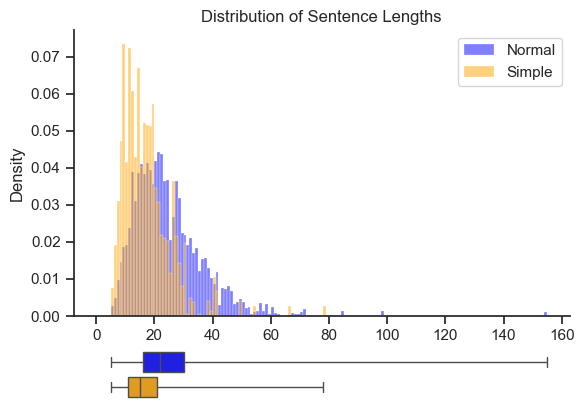

In [157]:
data = {
    'Length': wc_normal + wc_simple,
    'Type': ['Normal'] * len(wc_normal) + ['Simple'] * len(wc_simple)
}
df = pd.DataFrame(data)

sns.set(style="ticks")
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.85, .15)})

sns.boxplot(x='Length', y='Type', hue='Type', data=df, ax=ax_box, orient='h', whis=[0, 100], palette={'Normal': 'blue', 'Simple': 'orange'})
ax_box.set(yticks=[], ylabel=None)
ax_box.set(xlabel=None)
ax_box.set_axis_off()

sns.histplot(x=wc_normal, bins=range(0, max(max(wc_normal), max(wc_simple)) + 1), ax=ax_hist, color='blue', alpha=0.5, label='Normal', stat='density')
sns.histplot(x=wc_simple, bins=range(0, max(max(wc_normal), max(wc_simple)) + 1), ax=ax_hist, color='orange', alpha=0.5, label='Simple', stat='density')
ax_hist.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

ax_hist.legend()
ax_hist.set_title("Distribution of Sentence Lengths")
plt.show()

In [112]:
def select_fields(element):
    return element['normal_sentence'], element['simple_sentence']

transformed_dataset = devset.map(select_fields)
transformed_dataset

<_MapDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [113]:
for step, (normal_sentence, simple_sentence) in enumerate(transformed_dataset):
    print(step)
    print(normal_sentence)
    print(simple_sentence)

0
tf.Tensor(b'For example, in the petroleum industry, sodium hydroxide is used as an additive in drilling mud to increase alkalinity in bentonite mud systems, to increase the mud viscosity, and to neutralize any acid gas (such as hydrogen sulfide and carbon dioxide) which may be encountered in the geological formation as drilling progresses.', shape=(), dtype=string)
tf.Tensor(b'Sodium hydroxide can be made (with chlorine and hydrogen) using the chloralkali process.', shape=(), dtype=string)
1
tf.Tensor(b'Emer O\'Sullivan, in her "Comparative Children\'s Literature", notes "The Hobbit" as one of a handful of children\'s books that have been accepted into mainstream literature, alongside Jostein Gaarder\'s "Sophie\'s World" (1991) and J. K. Rowling\'s "Harry Potter" series (1997\xe2\x80\x932007).', shape=(), dtype=string)
tf.Tensor(b'At first Bilbo does not want to, but later he goes with them.', shape=(), dtype=string)
2
tf.Tensor(b'When certain liquids needs to be purified, siphoning 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



19353
tf.Tensor(b"On July 2013, the legislative proposal L 179 for the repealing of the Christiania Law is adopted by all parties in the Danish Parliament with the exception of the Danish People's Party.", shape=(), dtype=string)
tf.Tensor(b'On April 24, 2005, a 26-year-old Christiania resident was killed and three other residents injured in a violent gang assassination on Pusher Street.', shape=(), dtype=string)
19354
tf.Tensor(b'Different editions have been illustrated in diverse ways.', shape=(), dtype=string)
tf.Tensor(b'At the border of Mirkwood, Gandalf leaves the group.', shape=(), dtype=string)
19355
tf.Tensor(b"With regard to any technical issues with productions, Mayer left the details and solutions to MGM's engineers.", shape=(), dtype=string)
tf.Tensor(b'He died of leukemia.', shape=(), dtype=string)
19356
tf.Tensor(b'Howard Michael Mandel (born November 29, 1955) is a Canadian comedian, actor and television host.', shape=(), dtype=string)
tf.Tensor(b'He is also well known 

KeyboardInterrupt: 

---
## Model setup

---
## Model training